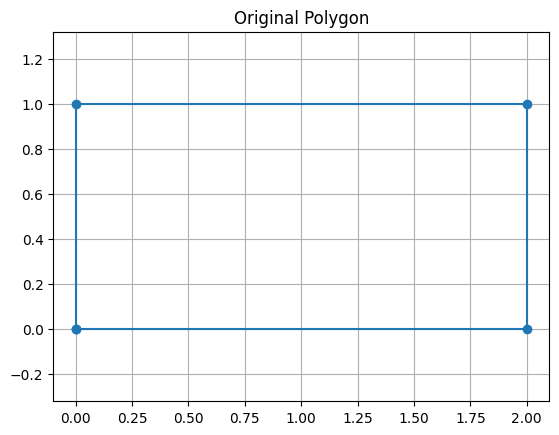

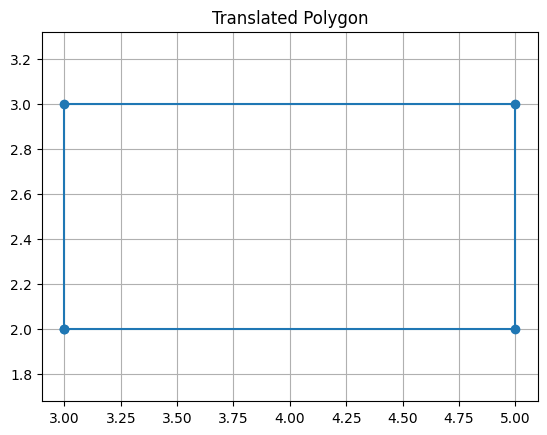

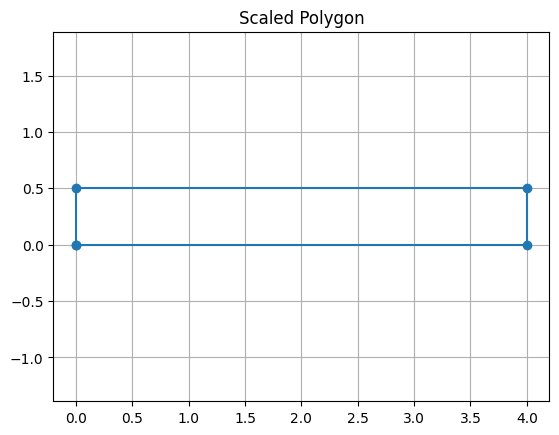

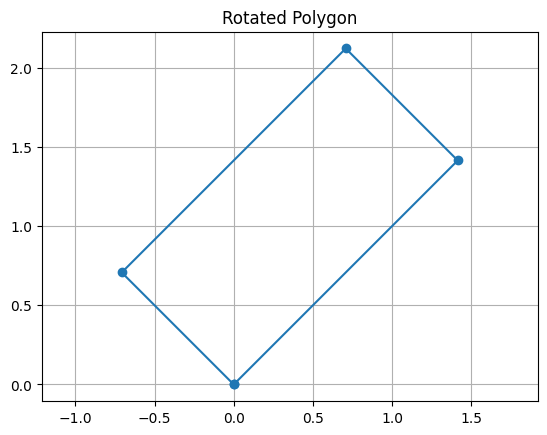

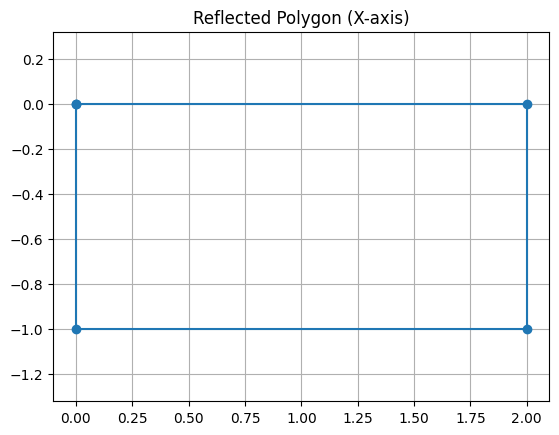

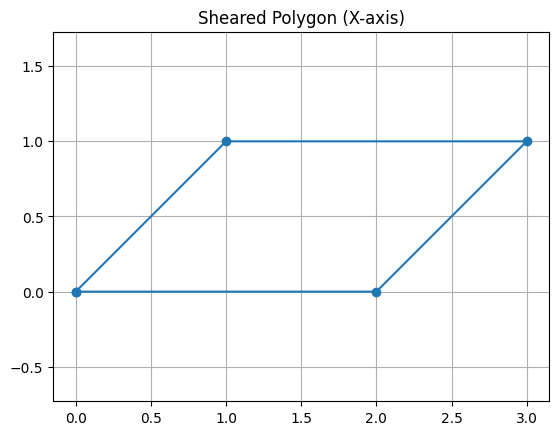

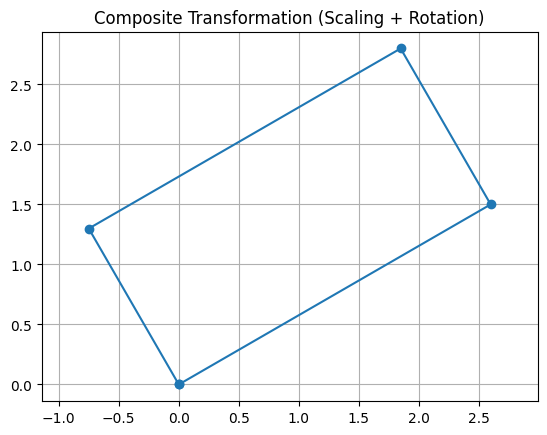

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygon(polygon, title="2D Transformation"):
    """Plot the 2D polygon."""
    polygon = np.append(polygon, [polygon[0]], axis=0)
    plt.plot(polygon[:, 0], polygon[:, 1], marker='o')
    plt.title(title)
    plt.axis("equal")
    plt.grid()
    plt.show()

def apply_transformation(polygon, transformation_matrix):
    """Apply a transformation to the polygon."""
    ones = np.ones((polygon.shape[0], 1))
    homogeneous_polygon = np.hstack([polygon, ones])
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]


polygon = np.array([[0, 0], [2, 0], [2, 1], [0, 1]])

def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def scaling_matrix(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def rotation_matrix(angle):
    rad = np.radians(angle)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad),  np.cos(rad), 0],
                     [0, 0, 1]])

def reflection_matrix(axis):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1]])
    elif axis == 'origin':
        return np.array([[-1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])

def shearing_matrix(shx=0, shy=0):
    return np.array([[1, shx, 0],
                     [shy, 1, 0],
                     [0, 0, 1]])

plot_polygon(polygon, title="Original Polygon")

# Translation
trans_matrix = translation_matrix(3, 2)
translated_polygon = apply_transformation(polygon, trans_matrix)
plot_polygon(translated_polygon, title="Translated Polygon")

# Scaling
scale_matrix = scaling_matrix(2, 0.5)
scaled_polygon = apply_transformation(polygon, scale_matrix)
plot_polygon(scaled_polygon, title="Scaled Polygon")

# Rotation
rot_matrix = rotation_matrix(45)
rotated_polygon = apply_transformation(polygon, rot_matrix)
plot_polygon(rotated_polygon, title="Rotated Polygon")

# Reflection
reflect_matrix = reflection_matrix('x')
reflected_polygon = apply_transformation(polygon, reflect_matrix)
plot_polygon(reflected_polygon, title="Reflected Polygon (X-axis)")

# Shearing
shear_matrix = shearing_matrix(shx=1)
sheared_polygon = apply_transformation(polygon, shear_matrix)
plot_polygon(sheared_polygon, title="Sheared Polygon (X-axis)")

# Composite Transformation (Scaling + Rotation)
composite_matrix = rotation_matrix(30) @ scaling_matrix(1.5, 1.5)
composite_polygon = apply_transformation(polygon, composite_matrix)
plot_polygon(composite_polygon, title="Composite Transformation (Scaling + Rotation)")


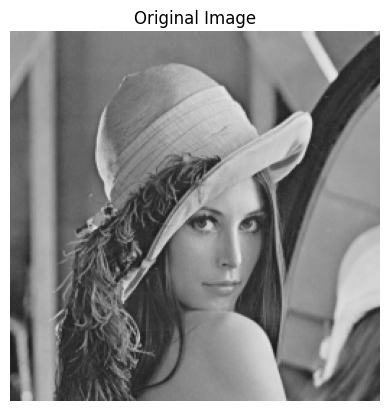

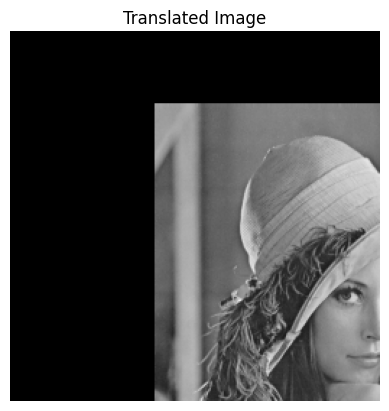

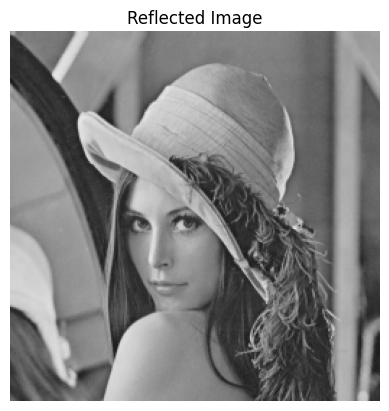

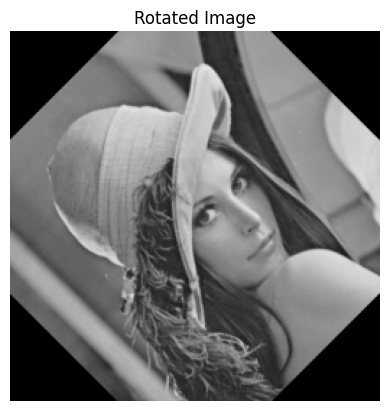

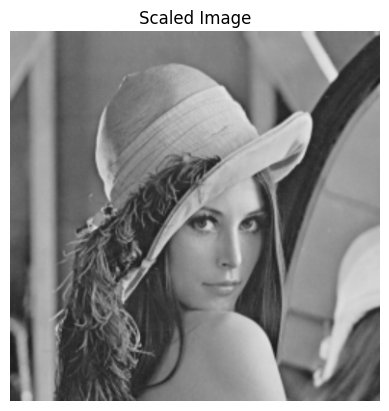

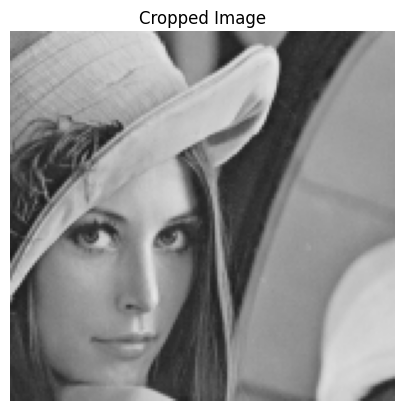

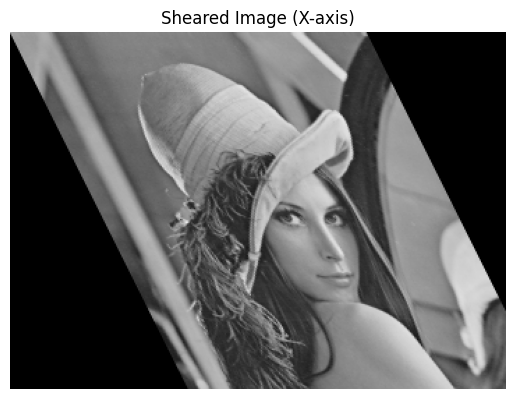

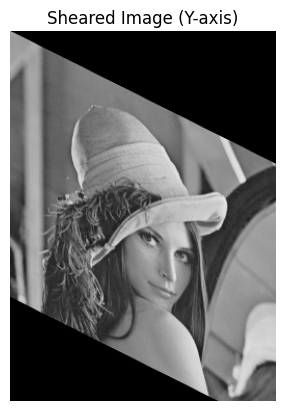

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, img):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

image_path = "Image.png"
img = cv2.imread(image_path)
display_image("Original Image", img)

# 1. Image Translation
rows, cols = img.shape[:2]
M_translation = np.float32([[1, 0, 100], [0, 1, 50]])  # Translate by (100, 50)
translated_img = cv2.warpAffine(img, M_translation, (cols, rows))
display_image("Translated Image", translated_img)

# 2. Image Reflection
flipped_img = cv2.flip(img, 1)  # Flip horizontally
display_image("Reflected Image", flipped_img)

# 3. Image Rotation
M_rotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate 45 degrees
rotated_img = cv2.warpAffine(img, M_rotation, (cols, rows))
display_image("Rotated Image", rotated_img)

# 4. Image Scaling
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
display_image("Scaled Image", scaled_img)

# 5. Image Cropping
cropped_img = img[50:200, 100:300]  # Crop a region
display_image("Cropped Image", cropped_img)

# 6. Image Shearing (X-axis)
M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])  # Shear along x-axis
sheared_img_x = cv2.warpAffine(img, M_shear_x, (cols + 100, rows))
display_image("Sheared Image (X-axis)", sheared_img_x)

# 7. Image Shearing (Y-axis)
M_shear_y = np.float32([[1, 0, 0], [0.5, 1, 0]])  # Shear along y-axis
sheared_img_y = cv2.warpAffine(img, M_shear_y, (cols, rows + 100))
display_image("Sheared Image (Y-axis)", sheared_img_y)
